In [6]:
import down_data
import importlib
importlib.reload(down_data)

import pandas as pd
import time

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.options.display.max_colwidth = 100
%matplotlib inline

In [7]:
def extract_coin_columns(df, coin_name):
    return df.loc[:, df.columns.str.endswith('_' + coin_name)]

def plot_coin(df):
    coin_name = df.columns[0].split('_')[1]
    
    ax = df.loc[:, df.columns.str.startswith('open')].plot(figsize=(20,10), title=coin_name, style='.-')
    ax = df.loc[:, df.columns.str.startswith('close')].plot(figsize=(20,10), ax=ax, style='.-')
    ax = df.loc[:, df.columns.str.startswith('high')].plot(figsize=(20,10), ax=ax, style='.-')
    df.loc[:, df.columns.str.startswith('low')].plot(figsize=(20,10), ax=ax, style='.-')

In [8]:
coins_list_btc_small = ['SYS','BCN','DGB']
coins_list_btc = ['SYS','BCN','DGB','LBC','NOTE','PASC','NAUT','SC','NEOS','ETH','ZEC','MAID','XRP',
                  'BTS','XEM','SBD','STRAT','LTC','AMP','BCY','ETC','ARDR','POT','NXT','BELA','XBC',
                  'BTCD','XMR','NXC','XCP','DCR','BLK','RIC','STEEM','NMC','PINK','OMNI','SJCX','NAV']

In [9]:
down = down_data.Downloader()

In [10]:
df_big = pd.DataFrame()
df_small = pd.DataFrame
coin_btc_previous = ''
limit = 2000
aggregate = 1
counter = 0

for coin_btc in coins_list_btc:
    counter += 1
    print(coin_btc, counter, len(coins_list_btc))
    histo = down.get_histo_json(coin_btc, 'BTC', limit=limit, aggregate=aggregate, t_horiz='hour')
    if len(df_big) == 0:
        df_big = pd.DataFrame(histo['Data']).add_suffix('_' + coin_btc).rename(columns={'time_'+coin_btc:'time'})
    else:
        df_small = pd.DataFrame(histo['Data']).add_suffix('_' + coin_btc).rename(columns={'time_'+coin_btc:'time'})
        df_big = pd.merge(df_big, df_small, on='time')
    time.sleep(0.5)
df_big = df_big.set_index('time')
df_big['time'] = pd.to_datetime(df_big['time'], unit='s')

SYS 1 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=SYS&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
BCN 2 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=BCN&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
DGB 3 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=DGB&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
LBC 4 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=LBC&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
NOTE 5 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=NOTE&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
PASC 6 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=PASC&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
NAUT 7 39
get_histohour request: https://min-api.cryptocompare.com/data/histohour?&fsym=NAUT&tsym=BTC&limit=2000&aggregate=1&e=Poloniex
SC 8 39
get_histohour request: https://min-api.cryptocom

In [21]:
df_big.tail()

,close_SYS,high_SYS,low_SYS,open_SYS,volumefrom_SYS,volumeto_SYS,close_BCN,high_BCN,low_BCN,open_BCN,...,low_SJCX,open_SJCX,volumefrom_SJCX,volumeto_SJCX,close_NAV,high_NAV,low_NAV,open_NAV,volumefrom_NAV,volumeto_NAV
time,,,,,,,,,,,,,,,,,,,,,
2017-09-06 06:00:00,0.000068,0.000072,0.000066,0.000069,1377653.19,95.66,4.300000e-07,4.500000e-07,4.300000e-07,4.300000e-07,...,0.000173,0.000177,612.72,0.10640,0.000296,0.000313,0.000296,0.000302,51897.83,15.89
2017-09-06 07:00:00,0.000072,0.000073,0.000067,0.000068,879270.32,62.20,4.500000e-07,4.500000e-07,4.300000e-07,4.300000e-07,...,0.000173,0.000174,2782.34,0.48400,0.000301,0.000301,0.000295,0.000296,59231.72,17.53
2017-09-06 08:00:00,0.000072,0.000073,0.000070,0.000072,683603.71,48.74,4.300000e-07,4.500000e-07,4.300000e-07,4.500000e-07,...,0.000174,0.000175,4750.37,0.84950,0.000304,0.000305,0.000296,0.000301,15329.41,4.63
2017-09-06 09:00:00,0.000068,0.000072,0.000065,0.000072,1699598.48,115.78,4.500000e-07,4.500000e-07,4.300000e-07,4.300000e-07,...,0.000177,0.000180,517.17,0.09253,0.000308,0.000310,0.000302,0.000304,25776.49,7.89
2017-09-06 10:00:00,0.000068,0.000068,0.000066,0.000068,260450.82,17.41,4.500000e-07,4.500000e-07,4.400000e-07,4.500000e-07,...,0.000176,0.000177,135.58,0.02387,0.000320,0.000320,0.000306,0.000308,49221.79,15.54


In [23]:
df_bcn = extract_coin_columns(df=df_big, coin_name='BCN')

In [39]:
df_bcn.head()

,close_BCN,high_BCN,low_BCN,open_BCN,volumefrom_BCN,volumeto_BCN,move_mean2,move_mean3,move_mean4,move_mean5,move_mean6,move_mean7,move_mean8,move_mean9,move_mean
time,,,,,,,,,,,,,,,
2017-06-15 02:00:00,0.000001,0.000001,0.000001,0.000001,11875256.41,14.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-15 03:00:00,0.000001,0.000001,0.000001,0.000001,9863474.06,11.70,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-15 04:00:00,0.000001,0.000001,0.000001,0.000001,5483697.63,6.52,0.000001,0.000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-15 05:00:00,0.000001,0.000001,0.000001,0.000001,14642440.46,17.28,0.000001,0.000001,0.000001,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-15 06:00:00,0.000001,0.000001,0.000001,0.000001,22380172.45,25.98,0.000001,0.000001,0.000001,0.000001,NaN,NaN,NaN,NaN,NaN


C:\Users\pavlat\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


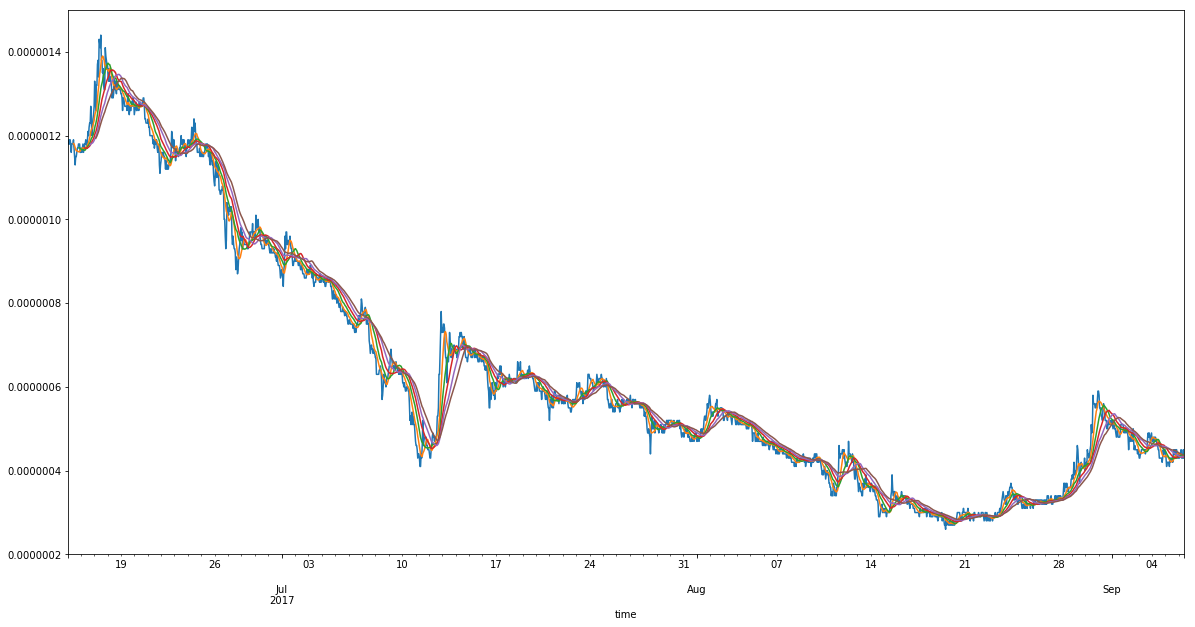

In [54]:
ax = df_bcn.open_BCN.plot()
for i in range(10, 60, 10):
    ax = df_bcn['move_mean{}'.format(i)] = df_bcn.open_BCN.rolling(window=i).mean().plot(figsize=(20,10), ax=ax)

In [48]:
df_bcn

,close_BCN,high_BCN,low_BCN,open_BCN,volumefrom_BCN,volumeto_BCN,move_mean2,move_mean3,move_mean4,move_mean5,...,move_mean9,move_mean,move_mean10,move_mean15,move_mean20,move_mean25,move_mean30,move_mean35,move_mean40,move_mean45
time,,,,,,,,,,,,,,,,,,,,,
2017-06-15 02:00:00,1.190000e-06,1.200000e-06,1.180000e-06,1.180000e-06,11875256.41,14.1300,NaN,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)",...,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)"
2017-06-15 03:00:00,1.180000e-06,1.200000e-06,1.180000e-06,1.190000e-06,9863474.06,11.7000,1.185000e-06,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)",...,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)"
2017-06-15 04:00:00,1.190000e-06,1.200000e-06,1.180000e-06,1.180000e-06,5483697.63,6.5200,1.185000e-06,1.183333e-06,NaN,"Axes(0.125,0.125;0.775x0.755)",...,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)"
2017-06-15 05:00:00,1.180000e-06,1.190000e-06,1.170000e-06,1.190000e-06,14642440.46,17.2800,1.185000e-06,1.186667e-06,1.185000e-06,"Axes(0.125,0.125;0.775x0.755)",...,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)"
2017-06-15 06:00:00,1.160000e-06,1.180000e-06,1.150000e-06,1.180000e-06,22380172.45,25.9800,1.185000e-06,1.183333e-06,1.185000e-06,"Axes(0.125,0.125;0.775x0.755)",...,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)"
2017-06-15 07:00:00,1.180000e-06,1.180000e-06,1.150000e-06,1.160000e-06,12074409.23,14.0800,1.170000e-06,1.176667e-06,1.177500e-06,"Axes(0.125,0.125;0.775x0.755)",...,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)"
2017-06-15 08:00:00,1.180000e-06,1.190000e-06,1.170000e-06,1.180000e-06,13900475.04,16.4100,1.170000e-06,1.173333e-06,1.177500e-06,"Axes(0.125,0.125;0.775x0.755)",...,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)"
2017-06-15 09:00:00,1.180000e-06,1.180000e-06,1.170000e-06,1.180000e-06,11030156.05,12.9400,1.180000e-06,1.173333e-06,1.175000e-06,"Axes(0.125,0.125;0.775x0.755)",...,NaN,NaN,"Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)"
2017-06-15 10:00:00,1.190000e-06,1.200000e-06,1.170000e-06,1.180000e-06,25555466.61,30.2800,1.180000e-06,1.180000e-06,1.175000e-06,"Axes(0.125,0.125;0.775x0.755)",...,1.180000e-06,NaN,"Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.125,0.125;0.775x0.755)","Axes(0.1

In [45]:
df_bcn[['open_BCN', 'move_mean10']].plot(figsize=(20,10))

KeyError: "['move_mean10'] not in index"

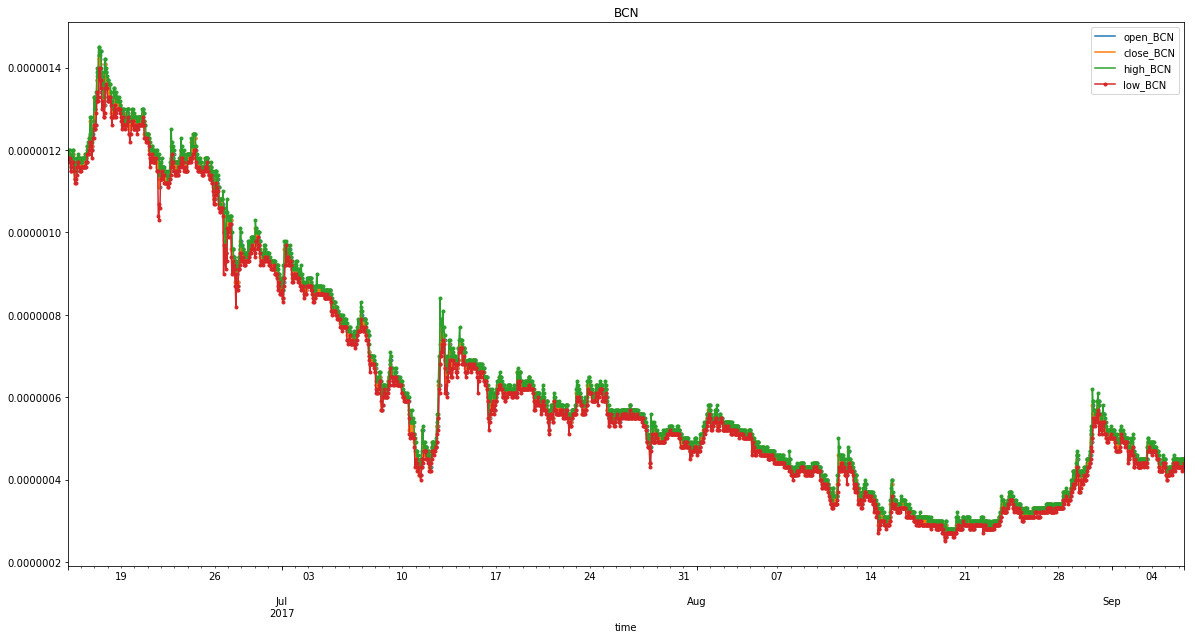

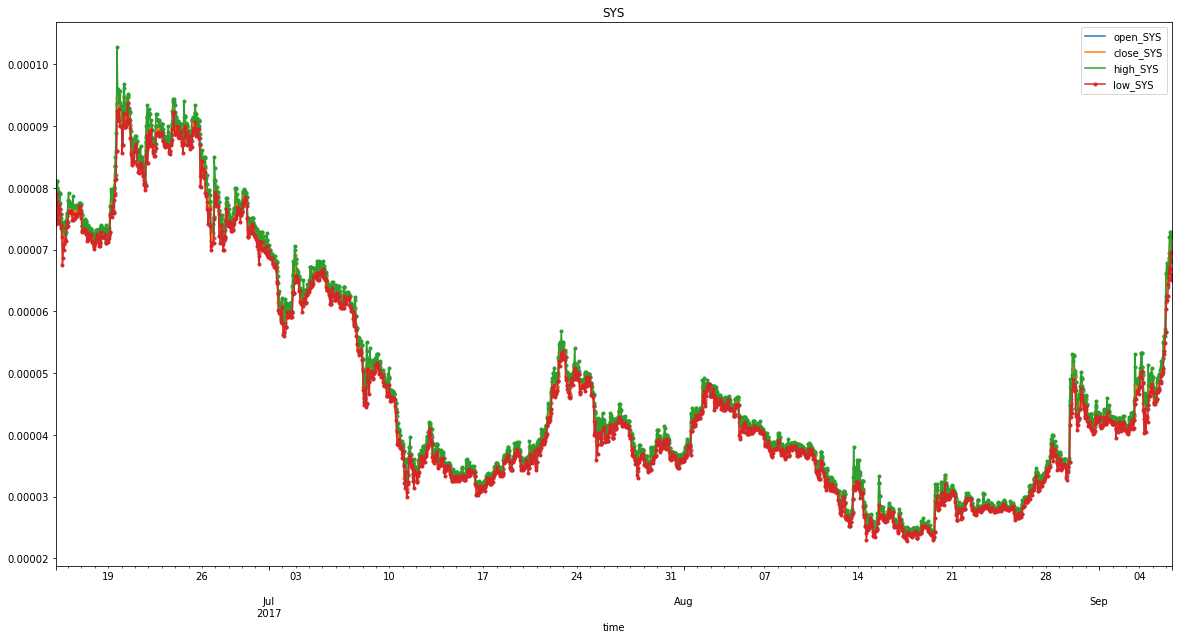

In [29]:
plot_coin(extract_coin_columns(df=df_big, coin_name='BCN'))
plot_coin(extract_coin_columns(df=df_big, coin_name='SYS'))